In [10]:
import lightgbm as lgbm
import sklearn.datasets

In [16]:
X_train, y_train, X_test, y_test = \
    sklearn.datasets.load_svmlight_files(['./data/train/train_libsvm.txt', 
                                         './data/test/test_libsvm.txt'])
print X_train.shape, X_test.shape

(11940760, 7158) (970902, 7158)


In [18]:
train = lgbm.Dataset(X_train, y_train)
test = lgbm.Dataset(X_test, y_test, reference=train)

In [ ]:
# Early stop at iteration 238
# CPU times: user 5h 28min 58s, sys: 7.36 s, total: 5h 29min 5s
# Wall time: 42min 49s
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 255,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'num_thread': 8,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'is_unbalance': True
}
%time lgbm_model = lgbm.train(params, train, num_boost_round=500, valid_sets=[test], early_stopping_rounds=10)

In [ ]:
# Early stop at iteration 208
# CPU times: user 5h 46min 48s, sys: 4.48 s, total: 5h 46min 52s
# Wall time: 44min 20s
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 511,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'num_thread': 8,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10,
    'is_unbalance': True
}
%time lgbm_model1 = lgbm.train(params, train, num_boost_round=500, valid_sets=[test], early_stopping_rounds=10)

In [24]:
prob =  lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
prob1 = lgbm_model1.predict(X_test, num_iteration=lgbm_model1.best_iteration)

In [25]:
print round(sklearn.metrics.roc_auc_score(y_test, prob),4)
print round(sklearn.metrics.roc_auc_score(y_test, prob1),4)

0.7493
0.7499


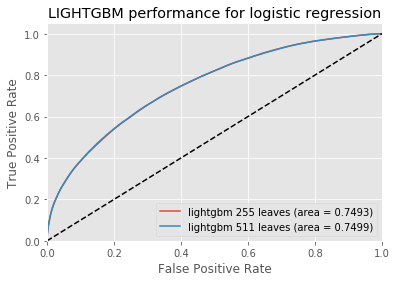

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.style
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
fpr, tpr, _ = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, _ = roc_curve(y_test, prob1)
roc_auc1 = auc(fpr1, tpr1)
%matplotlib inline
plt.plot(fpr, tpr, label='lightgbm 255 leaves (area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='lightgbm 511 leaves (area = %0.4f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LIGHTGBM performance for logistic regression')
plt.legend(loc="lower right")